In [1136]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0, Del0A=0.7, Del0C=-0.7, Deld=0, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel2 = scModel.Model(Del0=0, Del0A=1.5, Del0C=-1.5, Deld=0, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel3 = scModel.Model(Del0=0, Del0A=3, Del0C=-3, Deld=0, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel4 = scModel.Model(Del0=0, Del0A=0.2, Del0C=-0.2, Deld=0, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
H = myModel.HBdG()
H2 = myModel.HBdG()

In [1137]:
myModel.mu

0

In [1138]:
G = myModel.simple_stats()
print(G['avgap'])
H(1, 2)[8]

[0.18371534 2.06314406 0.36743069 2.06314406 0.18371534]


array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.7       +0.j, 0.        +0.j, 1.08060461+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])

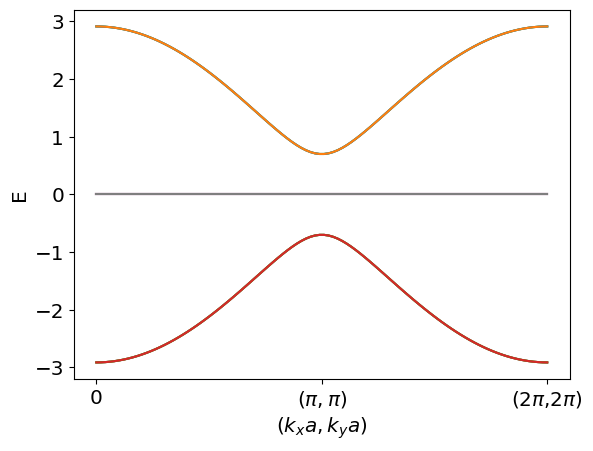

In [1139]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, np.sqrt(2)*np.pi, np.sqrt(2)*2*np.pi], labels=[r"0",r"($\pi,\pi$)",r"(2$\pi$,2$\pi$)"], size='x-large')

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
energies2 = myModel.solvHam(k, k)

plt.plot(np.sqrt(2)*k, energies)
#plt.plot(k, energies2[5], color='black')
plt.show()

In [1140]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
energies2 = myModel2.solvHam(kx, ky)
energies3 = myModel3.solvHam(kx, ky)
energies4 = myModel4.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [1141]:
emax = np.amax(energies3)
emax = emax+0.1*emax

In [1142]:
G = myModel.simple_stats()
print(G['av'][6])

0.18371534325014283


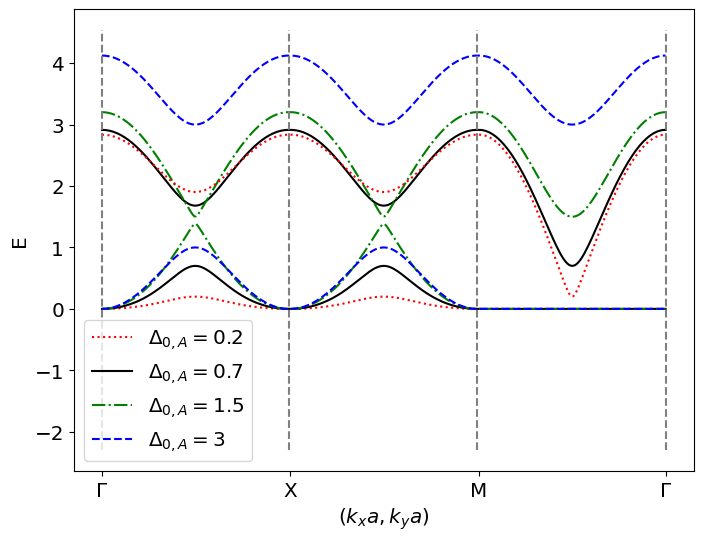

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

plt.plot(p, energies4[6], color='red', linestyle='dotted', label=r'$\Delta_{0,A}=0.2$')
plt.plot(p, energies[6], color='black', label=r'$\Delta_{0,A}=0.7$')
plt.plot(p, energies2[6], color='green', linestyle='dashdot', label=r'$\Delta_{0,A}=1.5$')
plt.plot(p, energies3[6], color='blue', linestyle='--', label=r'$\Delta_{0,A}=3$')

plt.plot(p, energies[8], color='black')
plt.plot(p, energies2[8], color='green', linestyle='dashdot')
plt.plot(p, energies3[8], color='blue', linestyle='--')
plt.plot(p, energies4[8], color='red', linestyle='dotted')

plt.vlines([0, 99, 199, 299], [-2.3, -2.3, -2.3, -2.3], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpathcomp.png")
plt.show()

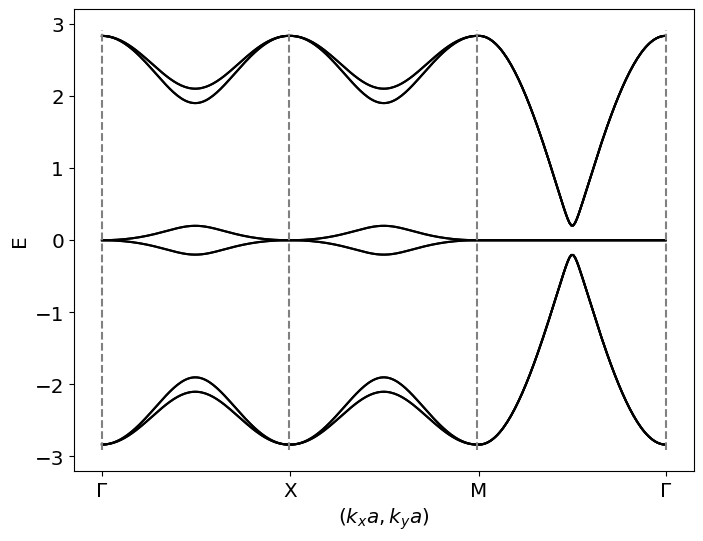

In [1155]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies4:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpath.png")
plt.show()

In [1145]:
H(1, 0)[11]

array([ 0. +0.j,  0. +0.j, -0.7+0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j,  0. +0.j])

In [1146]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

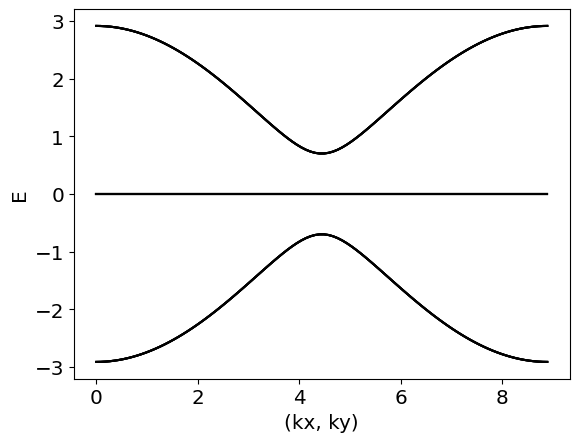

In [1147]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [1148]:
Ens = myModel.Es(k)

In [1149]:
np.shape(Ens)

(12, 10100)

In [1150]:
energies

array([[-2.91376046, -2.91237819, -2.90823301, ..., -2.90823301,
        -2.91237819, -2.91376046],
       [-2.91376046, -2.91237819, -2.90823301, ..., -2.90823301,
        -2.91237819, -2.91376046],
       [-2.91376046, -2.91237819, -2.90823301, ..., -2.90823301,
        -2.91237819, -2.91376046],
       ...,
       [ 2.91376046,  2.91237819,  2.90823301, ...,  2.90823301,
         2.91237819,  2.91376046],
       [ 2.91376046,  2.91237819,  2.90823301, ...,  2.90823301,
         2.91237819,  2.91376046],
       [ 2.91376046,  2.91237819,  2.90823301, ...,  2.90823301,
         2.91237819,  2.91376046]])

In [1151]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

2.9137604568666937

In [1152]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [1153]:
DOS1

array([1.36272328e-134, 4.09740599e-124, 4.69036863e-114, 2.04433784e-104,
       3.39315945e-095, 2.14500586e-086, 5.16537953e-078, 4.73930702e-070,
       1.65718410e-062, 2.20898688e-055, 1.12286746e-048, 2.17747361e-042,
       1.61168539e-036, 4.55589645e-031, 4.92223336e-026, 2.03452109e-021,
       3.22116331e-017, 1.95670740e-013, 4.57053270e-010, 4.11797893e-007,
       1.43757814e-004, 1.95778518e-002, 1.05147446e+000, 2.26846204e+001,
       2.03290900e+002, 8.07631010e+002, 1.61774841e+003, 2.04709579e+003,
       2.14055723e+003, 2.16925220e+003, 2.20741631e+003, 2.25795415e+003,
       2.32067215e+003, 2.39767584e+003, 2.49370421e+003, 2.61854196e+003,
       2.79642574e+003, 3.08491107e+003, 3.48535164e+003, 3.66193121e+003,
       3.34535543e+003, 2.90441610e+003, 2.61850760e+003, 2.44420351e+003,
       2.32169562e+003, 2.22841806e+003, 2.15498582e+003, 2.09649167e+003,
       2.05014269e+003, 2.01440969e+003, 1.98871414e+003, 1.97343678e+003,
       1.97032912e+003, 1

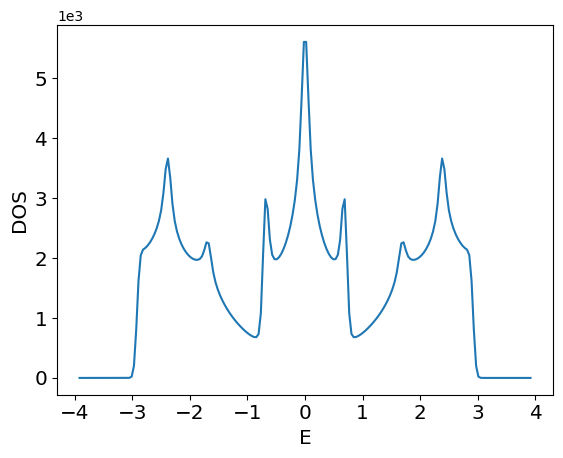

In [1154]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()